In [97]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from glob import glob

In [98]:
IMAGE_SIZE=(224,224,3)
base_model =  MobileNetV3Small(weights='imagenet',input_shape=IMAGE_SIZE, include_top=False)

In [99]:
for m in base_model.layers:
    print(f'{m.name:<40}{m.input_shape}{m.trainable}')

input_5                                 [(None, 224, 224, 3)]True
rescaling_4                             (None, 224, 224, 3)True
Conv                                    (None, 224, 224, 3)True
Conv/BatchNorm                          (None, 112, 112, 16)True
tf.__operators__.add_108                (None, 112, 112, 16)True
re_lu_128                               (None, 112, 112, 16)True
tf.math.multiply_108                    (None, 112, 112, 16)True
multiply_72                             [(None, 112, 112, 16), (None, 112, 112, 16)]True
expanded_conv/depthwise/pad             (None, 112, 112, 16)True
expanded_conv/depthwise                 (None, 113, 113, 16)True
expanded_conv/depthwise/BatchNorm       (None, 56, 56, 16)True
re_lu_129                               (None, 56, 56, 16)True
expanded_conv/squeeze_excite/AvgPool    (None, 56, 56, 16)True
expanded_conv/squeeze_excite/Conv       (None, 1, 1, 16)True
expanded_conv/squeeze_excite/Relu       (None, 1, 1, 8)True
expanded_conv/squ

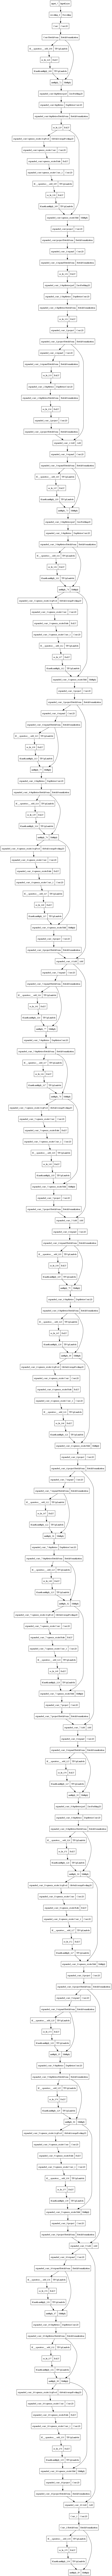

In [100]:
tf.keras.utils.plot_model(base_model)

In [101]:
base_model.layers[10].get_weights()

[array([10.871277 ,  3.9053178,  4.121389 , -4.351491 ,  3.6165092,
         5.134261 ,  4.215066 ,  3.6632724,  3.6444292,  1.531459 ,
         7.5584254,  2.0542848, 10.736845 ,  4.1285405,  2.1450431,
         3.2800307], dtype=float32),
 array([ 5.5368867 , 20.05415   , 12.011837  , 12.930948  , 10.090904  ,
        24.112999  ,  2.0265532 , 11.811472  , 12.382059  ,  0.9426266 ,
         1.4242793 , 14.368851  ,  7.444304  , 11.310626  ,  0.28129232,
        12.7095175 ], dtype=float32),
 array([ 8.0620933e-01,  3.1572427e+02,  4.2805419e+00,  3.3674687e-01,
         1.4188943e+00,  7.7734241e+00, -1.0186859e-01,  3.9855700e-02,
         1.6643893e+00,  1.1841042e+00, -2.3483506e-01, -3.4579227e+00,
        -1.2362951e+00, -7.8978553e+00,  1.7276879e-01, -4.7720647e-01],
       dtype=float32),
 array([224.50896  , 787.0944   , 153.22946  ,   3.0053153, 114.59917  ,
         34.488277 ,   4.24548  , 215.58965  , 120.141754 ,  30.693308 ,
        165.21883  ,  74.44124  ,  58.80348 

# Membuat Layer dan Dense Modifikasi untuk arsitektur yang Baru

In [102]:
x = base_model.output

In [103]:
x

<KerasTensor: shape=(None, 7, 7, 576) dtype=float32 (created by layer 'multiply_89')>

# Model Baru Yosia

In [104]:
from tensorflow.keras.layers import concatenate  # Importing the concatenate function

NUM_CLASSES = 10
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', name='Yosia_Modif')(x)
x1 = Dense(1024, activation='relu', name='Yosia_Modif_x_1024')(x)
x2 = Dense(512, activation='relu', name='Yosia_Modif_x_512')(x1)
x3 = Dense(256, activation='relu', name='Yosia_Modif_x_256')(x2)
x4 = Dense(128, activation='relu', name='Yosia_Modif_x_128')(x3)

z1 = Dense(1024, activation='relu', name='Yosia_Modif_z_1024')(x)
z2 = Dense(512, activation='relu', name='Yosia_Modif_z_512')(z1)
z3 = Dense(256, activation='relu', name='Yosia_Modif_z_256')(z2)
z4 = Dense(128, activation='relu', name='Yosia_Modif_z_128')(z3)

merge = concatenate([x4, z4])  # Merging layers x4 and z4
merged_layer = Dense(32, activation='relu')(merge)
output_layer = Dense(NUM_CLASSES, activation='softmax')(merged_layer)
model = Model(inputs=base_model.input, outputs=output_layer, name='NewMobileNetY8')


# Struktur Baru NewMobileNetY8

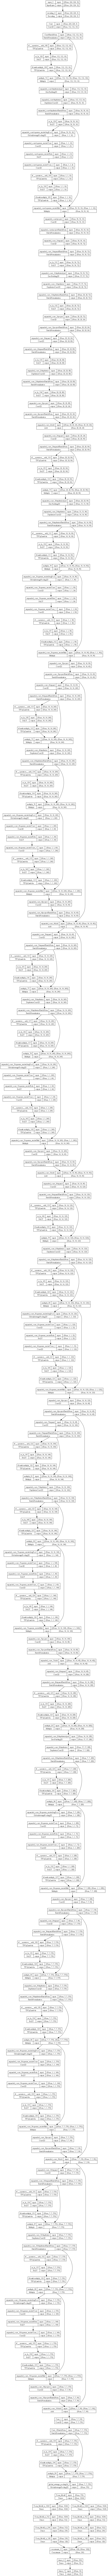

In [105]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=80)

In [106]:
model.summary()

Model: "NewMobileNetY8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_4[0][0]']            
                                )                                                                 
                                                                                     

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_132 (ReLU)               (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_132[0][0]']              
 D)                                                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_74[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

 Lambda)                                                         Conv_1[0][0]']                   
                                                                                                  
 re_lu_140 (ReLU)               (None, 1, 1, 240)    0           ['tf.__operators__.add_115[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.multiply_115 (TFOpLamb  (None, 1, 1, 240)   0           ['re_lu_140[0][0]']              
 da)                                                                                              
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_76[0][0]',            
 /Mul (Multiply)                                                  'tf.math.multiply_115[0][0]']   
          

 /Mul (Multiply)                                                  'tf.math.multiply_118[0][0]']   
                                                                                                  
 expanded_conv_5/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_5/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_5/Add (Add)      (None, 14, 14, 40)   0           ['expanded_conv_4/Add[0][0]',    
                                                                  'expanded_conv_5/project/BatchNo
          

                                                                                                  
 expanded_conv_7/expand/BatchNo  (None, 14, 14, 144)  576        ['expanded_conv_7/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_122 (TFOp  (None, 14, 14, 144)  0          ['expanded_conv_7/expand/BatchNor
 Lambda)                                                         m[0][0]']                        
                                                                                                  
 re_lu_147 (ReLU)               (None, 14, 14, 144)  0           ['tf.__operators__.add_122[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.m

                                                                                                  
 tf.math.multiply_125 (TFOpLamb  (None, 14, 14, 288)  0          ['re_lu_150[0][0]']              
 da)                                                                                              
                                                                                                  
 multiply_83 (Multiply)         (None, 14, 14, 288)  0           ['expanded_conv_8/expand/BatchNor
                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_125[0][0]']   
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, 17, 17, 288)  0          ['multiply_83[0][0]']            
 (ZeroPadding2D)                                                                                  
          

 expanded_conv_9/depthwise/Batc  (None, 7, 7, 576)   2304        ['expanded_conv_9/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_129 (TFOp  (None, 7, 7, 576)   0           ['expanded_conv_9/depthwise/Batch
 Lambda)                                                         Norm[0][0]']                     
                                                                                                  
 re_lu_154 (ReLU)               (None, 7, 7, 576)    0           ['tf.__operators__.add_129[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.multiply_129 (TFOpLamb  (None, 7, 7, 576)   0           ['re_lu_154[0][0]']              
 da)      

 tf.math.multiply_132 (TFOpLamb  (None, 7, 7, 576)   0           ['re_lu_157[0][0]']              
 da)                                                                                              
                                                                                                  
 multiply_88 (Multiply)         (None, 7, 7, 576)    0           ['expanded_conv_10/depthwise/Batc
                                                                 hNorm[0][0]',                    
                                                                  'tf.math.multiply_132[0][0]']   
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_88[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
          

                                                                                                  
 dense_6 (Dense)                (None, 32)           8224        ['concatenate_3[0][0]']          
                                                                                                  
 dense_7 (Dense)                (None, 10)           330         ['dense_6[0][0]']                
                                                                                                  
Total params: 5,015,770
Trainable params: 5,003,658
Non-trainable params: 12,112
__________________________________________________________________________________________________


In [107]:
import os
# Simpan summary model ke dalam file teks
model_summary_file = 'model_summary.txt'
with open(model_summary_file, 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Tampilkan output menggunakan less (atau perintah lainnya)
os.system('less ' + model_summary_file)

1

# Lihat Model Trainabel atau Tidak

In [108]:
for m in model.layers[-10:]:
    print(f'{m.name}{m.trainable}')

Yosia_Modif_z_1024True
Yosia_Modif_x_512True
Yosia_Modif_z_512True
Yosia_Modif_x_256True
Yosia_Modif_z_256True
Yosia_Modif_x_128True
Yosia_Modif_z_128True
concatenate_3True
dense_6True
dense_7True


In [109]:
for m in model.layers:
    m.trainable=False
for m in model.layers[-19:]:
    m.trainable=True
for m in model.layers[-25:]:
    print(f'{m.name}{m.trainable}')

re_lu_158False
tf.math.multiply_133False
expanded_conv_10/squeeze_excite/MulFalse
expanded_conv_10/projectFalse
expanded_conv_10/project/BatchNormFalse
expanded_conv_10/AddFalse
Conv_1True
Conv_1/BatchNormTrue
tf.__operators__.add_134True
re_lu_159True
tf.math.multiply_134True
multiply_89True
global_average_pooling2d_3True
Yosia_ModifTrue
Yosia_Modif_x_1024True
Yosia_Modif_z_1024True
Yosia_Modif_x_512True
Yosia_Modif_z_512True
Yosia_Modif_x_256True
Yosia_Modif_z_256True
Yosia_Modif_x_128True
Yosia_Modif_z_128True
concatenate_3True
dense_6True
dense_7True


In [110]:
ImageDataGenerator?

In [111]:
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input)

In [112]:
TARGET_SIZE=(224,224)
BATCH_SIZE =32
train_dir ='SIMPLISIANEW/train'
test_dir ='SIMPLISIANEW/test'
valid_dir='SIMPLISIANEW/validation'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    interpolation='nearest',
  )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    interpolation='nearest',
    shuffle=False,
  )


valid_generator = train_datagen.flow_from_directory(
    valid_dir,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    interpolation='nearest',
  )

Found 683 images belonging to 10 classes.
Found 220 images belonging to 10 classes.
Found 238 images belonging to 10 classes.


In [113]:
images, labels = next(train_generator)

In [114]:
images.shape

(32, 224, 224, 3)

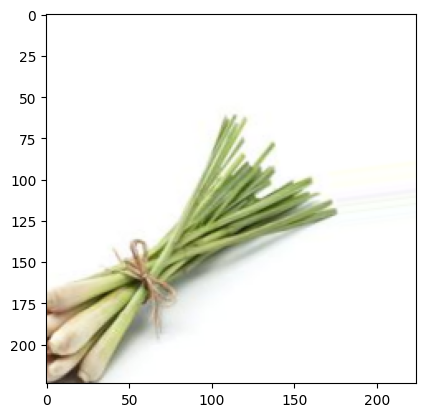

In [115]:
plt.imshow(images[3].astype('uint8'));

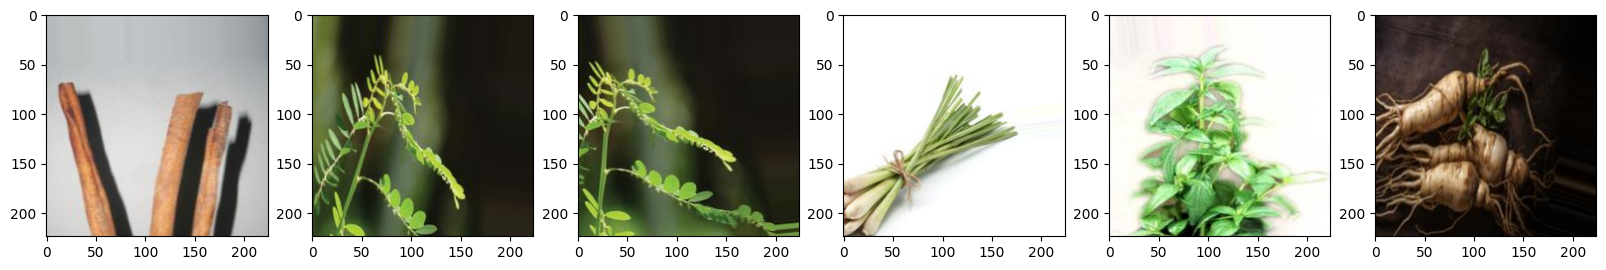

In [116]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 6, figsize=(20, 20))
ax = ax.flatten()

for img, a in zip(images[:6], ax):
    a.imshow(img.astype('uint8'))

plt.show()


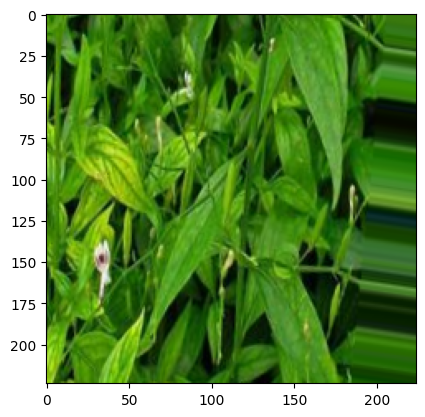

In [117]:
plt.imshow(images[12].astype('uint8'))

In [118]:
np.argmax(labels,axis=1)

array([2, 6, 6, 9, 8, 0, 4, 8, 5, 3, 6, 6, 8, 2, 7, 9, 2, 4, 9, 8, 0, 1,
       5, 1, 6, 3, 3, 2, 7, 7, 9, 1], dtype=int64)

In [119]:
train_generator.class_indices

{'gingseng': 0,
 'jahe': 1,
 'kayu manis': 2,
 'kunyit': 3,
 'lengkuas': 4,
 'mahkota dewa': 5,
 'meniran': 6,
 'pace': 7,
 'sambiloto': 8,
 'sereh': 9}

# MELAKUKAN COMPAIL DATA

In [120]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [121]:
history = model.fit(train_generator,steps_per_epoch=15,validation_steps=4,epochs=15)
history

Epoch 1/15
10/15 [===================>..........] - ETA: 3s - loss: 2.1770 - accuracy: 0.2174

D:\project\env\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 16s 738ms/step - loss: 2.0535 - accuracy: 0.2614
Epoch 2/15
15/15 [==============================] - 9s 567ms/step - loss: 1.1577 - accuracy: 0.6013
Epoch 3/15
15/15 [==============================] - 8s 511ms/step - loss: 0.8522 - accuracy: 0.7211
Epoch 4/15
15/15 [==============================] - 8s 512ms/step - loss: 0.5053 - accuracy: 0.8715
Epoch 5/15
15/15 [==============================] - 7s 482ms/step - loss: 0.4565 - accuracy: 0.8693
Epoch 6/15
15/15 [==============================] - 8s 515ms/step - loss: 0.3260 - accuracy: 0.9146
Epoch 7/15
15/15 [==============================] - 7s 476ms/step - loss: 0.3597 - accuracy: 0.8954
Epoch 8/15
15/15 [==============================] - 7s 493ms/step - loss: 0.2483 - accuracy: 0.9368
Epoch 9/15
15/15 [==============================] - 8s 492ms/step - loss: 0.2216 - accuracy: 0.9542
Epoch 10/15
15/15 [==============================] - 8s 519ms/step - loss: 0.2100 - accuracy: 0.9375
Epoch 11/

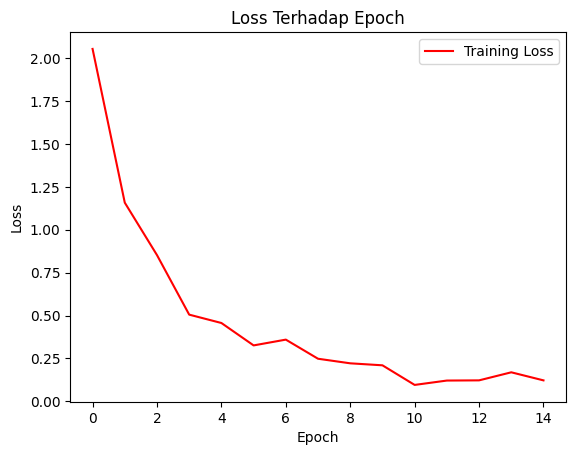

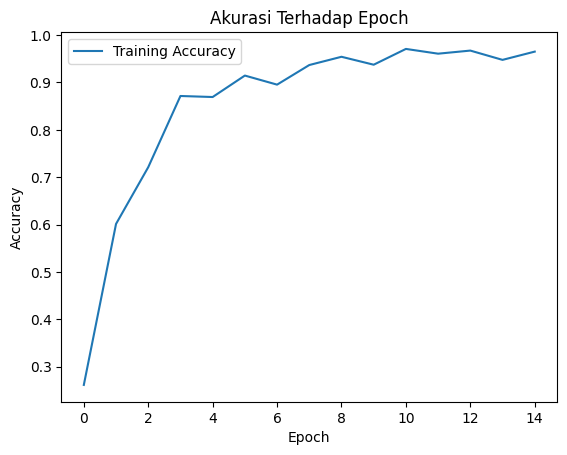

In [122]:
# Plot loss terhadap epoch
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Loss Terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot akurasi terhadap epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Akurasi Terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
prediksi = model.predict(test_generator)
prediksi

7/7 [==============================] - 6s 806ms/step


array([[9.8643559e-01, 6.3917213e-03, 3.1429693e-07, ..., 1.7669227e-03,
        1.1973562e-04, 1.8153668e-03],
       [1.4790738e-01, 7.9663241e-01, 4.5161528e-04, ..., 8.6417235e-04,
        1.0738181e-03, 7.2496133e-03],
       [9.9652195e-01, 1.7490771e-03, 7.0449859e-09, ..., 4.7838385e-04,
        1.7058010e-05, 4.4878994e-04],
       ...,
       [6.3822014e-08, 4.0562897e-10, 8.4913090e-08, ..., 1.0548719e-10,
        2.0383122e-10, 9.9999762e-01],
       [1.0465476e-07, 1.1302687e-09, 1.3189339e-07, ..., 2.1556459e-10,
        3.4858028e-10, 9.9999475e-01],
       [6.0389521e-06, 1.3096388e-07, 3.6800184e-06, ..., 4.1103284e-08,
        6.4124492e-08, 9.9990416e-01]], dtype=float32)

In [124]:
y_pred =np.argmax(prediksi, axis=1)

In [125]:
y_pred

array([0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 1, 1, 1, 3,
       1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 9,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6,
       6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9],
      dtype=int64)

In [126]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(test_generator.classes, y_pred)
cm

array([[14,  2,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 1,  0, 19,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 24,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 24]], dtype=int64)

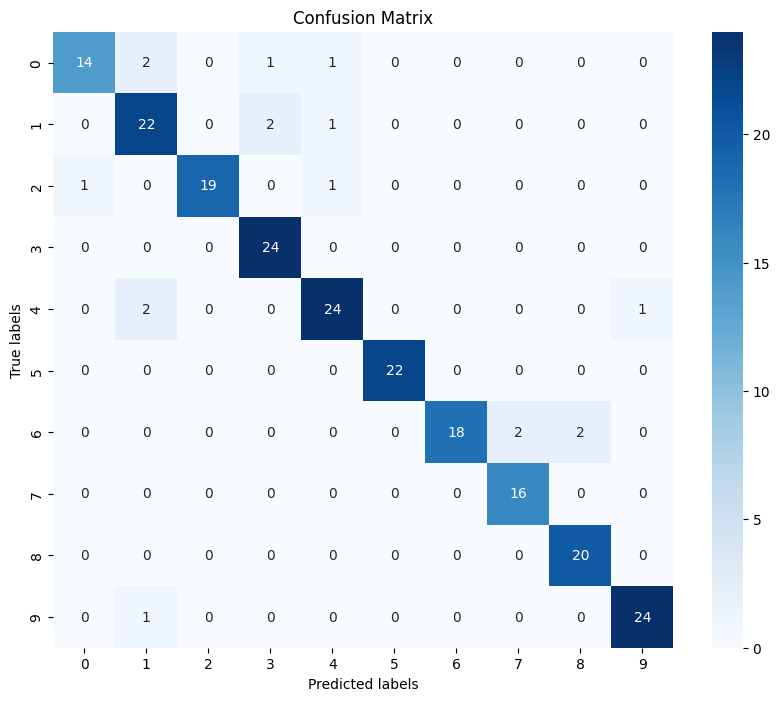

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the confusion matrix stored in the variable cm

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [129]:
model.save('transfer_learning.keras')